## Reformating dataframes for analysing Tio's output

In [1]:
#Import packages
from platform import python_version
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import re

In [2]:
#Be clear on versions of packages
print("python version==%s" % python_version())
print("pandas==%s" % pd.__version__)
print("re==%s" % re.__version__)

python version==3.6.5
pandas==0.23.0
re==2.2.1


In [3]:
#Presenting non trunctated output
#Set presentation options
pd.options.display.max_columns = 10 # to avoid truncated output 
pd.options.display.max_rows = 250 #
pd.options.display.max_colwidth = 250 # I don't want cell content to be truncated.

### Pseudo-code

*  Step 1) Add a header to storedData (the input dataframe)
*  Step 2) Create a list of strings containing Tio's regular intro lines. Keeping this as a seperate list will make it easier to update this process if we alter Tio's intro.
*  Step 3) Drop the dataframe rows that don't contain any content from the list from step 3 in "Tio_says" column and create a new dataframe.
*  Step 4) Sort date/time column ascending in order to unravel any mixed up conversations.

###  The data
I have selected a subset of the data - from 21 May @ 20:32:28 until 31 May @ 18:27 - as a test dataset.

In [4]:
#Read in the storedData frame 
# and add headers to input dataframe (Step 1)

stored_data = pd.read_excel("C:/Users/sonja/Desktop/Life_Admin/Chatbot/data_format.xlsx", 
                      sheet_name='storedData_May', header = None, names = ['datetime_id', 'user', 'user_says', 
          'chatbot', 'chatbot_says'])
stored_data.shape

(2604, 5)

In [5]:
#Let's eyeball the data
#stored_data.sample(3)

### Step 2: Create list with Tio's intro chat

In [6]:
Tios_intro = ['YesÂ¬ happy to listen to the explanation of how this bot works',
'OKÂ¬ I will talk with you even though you are a simple bot.',
'OKÂ¬ I understand that you do not know who I am.',
'OKÂ¬ I know you cannot provide emergency services',
'OKÂ¬ I know what you mean by anonymous.',
'OKÂ¬ I know what you mean by confidential.',
'Anonymous (my words can help improve the bot)',
'YesÂ¬ I am happy to let you see how I feel at the end too',
'YesÂ¬ when I am finished I will click the stop button',
"YesÂ¬ I agree to fill in the quick survey at the end. I'll type 'stop' in a text field.",
'Confidential (no human ever sees my words)', 
'finalHappinessScore (!!) = Stop',
'initialHappinessScore (!!) = 1',
'initialHappinessScore (!!) = 2',
'initialHappinessScore (!!) = 3',
'initialHappinessScore (!!) = 4',             
'initialHappinessScore (!!) = 5',
'initialHappinessScore (!!) = 6',             
'initialHappinessScore (!!) = 7',
'initialHappinessScore (!!) = 8',
'initialHappinessScore (!!) = 9',
'initialHappinessScore (!!) = 10',            
'finalHappinessScore (!!) = 1',
'finalHappinessScore (!!) = 2',
'finalHappinessScore (!!) = 3',
'finalHappinessScore (!!) = 4',
'finalHappinessScore (!!) = 5',
'finalHappinessScore (!!) = 6',
'finalHappinessScore (!!) = 7',
'finalHappinessScore (!!) = 8',
'finalHappinessScore (!!) = 9',
'finalHappinessScore (!!) = 10']    

### Step 3: Drop those rows that contain Tio's intro chat

In [7]:
#Clean function
def clean_string(data_list):
    clean_data = []
    for string in data_list:
# remove anything from the string that is not text 
        cleaned_string = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ",string).split()) # So it is only text
        clean_data.append(cleaned_string)
    return clean_data

In [8]:
stored_data['user_says'] = clean_string(stored_data['user_says']) # clean the df data
cleaned_Tios_intro = clean_string(Tios_intro) # Do the same for the Tios_intro strings
print(stored_data.shape)

(2604, 5)


In [9]:
# After applying the clena function the isin function finds matches.

df_new = stored_data[~stored_data.user_says.isin(cleaned_Tios_intro)] 
print(df_new.shape)

(382, 5)


In [10]:
#df_new.head()

In [11]:
#What is the length of the conversations
convo_size = df_new.groupby(['datetime_id']).size()
convo_size

datetime_id
['2020-05-21 20:32:28.387767'     6
['2020-05-21 20:38:47.494863'     1
['2020-05-21 20:52:09.785223'     4
['2020-05-21 20:57:58.768489'    15
['2020-05-21 21:10:35.593502'     4
['2020-05-21 21:32:24.524643'     3
['2020-05-21 21:48:01.324553'    11
['2020-05-22 01:03:14.043631'     1
['2020-05-22 01:07:08.542667'     1
['2020-05-22 01:58:52.524054'     1
['2020-05-22 08:36:27.028797'     1
['2020-05-22 15:14:07.217119'     4
['2020-05-22 16:39:41.347744'     1
['2020-05-22 17:18:17.579742'     7
['2020-05-22 17:38:49.682616'     1
['2020-05-22 18:53:48.748125'     1
['2020-05-22 20:11:53.462745'     3
['2020-05-22 20:33:26.373135'     1
['2020-05-22 21:30:51.419957'     2
['2020-05-22 23:38:38.869182'     1
['2020-05-23 02:13:34.146601'    17
['2020-05-23 02:25:40.131295'     5
['2020-05-23 02:45:32.801144'     4
['2020-05-23 12:51:28.869748'     1
['2020-05-23 13:06:05.177925'     1
['2020-05-23 13:57:46.952205'     1
['2020-05-23 14:39:23.900857'     1
['2020-05-23 18:

In [12]:
import matplotlib.pyplot as plt

Text(0,0.5,'Frequency')

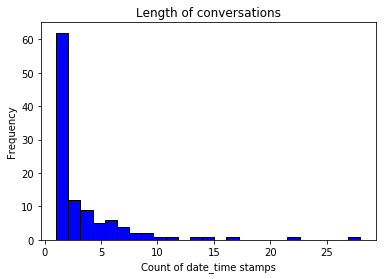

In [13]:
plt.hist(convo_size, color = 'blue', edgecolor = 'black', bins = int(25/1))
plt.title('Length of conversations')
plt.xlabel('Count of date_time stamps')
plt.ylabel('Frequency')

#### Step 4 : sort datetime_id column to ensure that we don't have convos crossing

In [14]:
df_new_sorted = df_new.sort_values(by='datetime_id', ascending = True) #default is ascending

In [15]:
df_new_sorted.shape

(382, 5)

Things to think about:
     - when I try this on another slice of storedData will need to see how easy it is to skim thro's the convos. I may want to reintroduce the "initialHappinessScore" rows, just because it delineates conversations. 
       - Large number of single date_time stamp convos - could take a closer look at whether we think Tio is inviting enough.